### Eigenfashion

In [85]:
from glob import glob
from PIL import Image
from resizeimage import resizeimage
import numpy as np
import matplotlib.pyplot as plt

# create paths for all images
man_images = glob('man_200/*')
female_images = glob('female_200/*')

images = []
# for each image path
for path in man_images:
    # open it as a read file in binary mode
    with open(path, 'r+b') as f:
        # open it as an image
        with Image.open(f) as image:
            # resize the image to be more manageable
            cover = resizeimage.resize_cover(image, [1, 1])
            # flatten the matrix to an array and append it to all flattened images
            images.append((np.array(cover).flatten(), 0))
            
for path in female_images:
    # open it as a read file in binary mode
    with open(path, 'r+b') as f:
        # open it as an image
        with Image.open(f) as image:
            # resize the image to be more manageable
            cover = resizeimage.resize_cover(image, [1, 1])
            # flatten the matrix to an array and append it to all flattened images
            images.append((np.array(cover).flatten(), 1))
            

# Flatten it once more
images_flattened = np.asarray(images)

# Declare which are the X and Y inputs
X = images_flattened[:,0]
Y = images_flattened[:,1]

# Use np.stack to put the data into the right dimension
X = np.stack(i for i in X)
Y = np.stack(i for i in Y)

/usr/local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3337: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


In [86]:
X.shape

(400, 3)

In [3]:
X[0].reshape(80,100,3)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

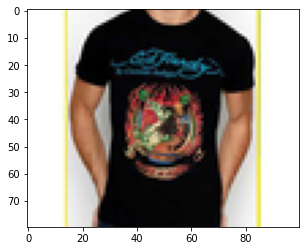

In [4]:
plt.imshow(X[0].reshape(80,100,3))

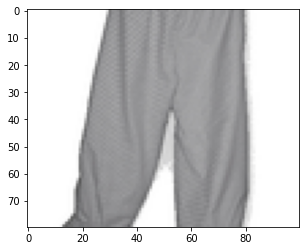

In [5]:
plt.imshow(X[1].reshape(80,100,3))

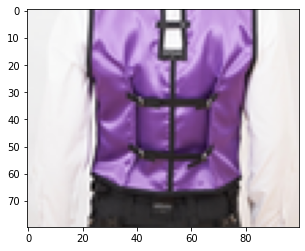

In [6]:
plt.imshow(X[5].reshape(80,100,3))

### LDA

In [88]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
X_train.shape, y_train.shape

((360, 3), (360,))

In [90]:
lda.fit(X_train,y_train)
print(lda.explained_variance_ratio_)
print(lda.priors_)

[1.]
[0.48888889 0.51111111]


In [91]:
lda.score(X_test, y_test)

0.625

In [37]:
lda_2 = LDA(n_components=1)

In [38]:
x_lda_2 = lda_2.fit_transform(X,Y)

In [39]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(x_lda_2, Y, test_size=0.4, random_state=0)
X_train_2.shape, y_train_2.shape

((240, 1), (240,))

### Logistic Regression

In [87]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_2, y_train_2)
y_pred = logreg.predict(X_test)

ValueError: X has 75 features per sample; expecting 1

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test_2, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.87      0.90        83
           1       0.87      0.94      0.90        77

    accuracy                           0.90       160
   macro avg       0.90      0.90      0.90       160
weighted avg       0.90      0.90      0.90       160

